<a href="https://colab.research.google.com/github/neha2801-create/Basket_Game/blob/main/Digital_Signal_Processing_Error_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSP Error Prediction Using Machine Learning

## Problem Statement
In Digital Signal Processing (DSP), errors such as noise, distortion, phase shifts, and other anomalies can significantly affect the quality and integrity of signals. Detecting and diagnosing these errors is crucial for maintaining system performance and ensuring high-quality signal processing.

The challenge is to identify and classify different types of errors in DSP signals, enabling proactive error handling and system optimization.

## Objective
The goal of this project is to build a machine learning model that can automatically detect and classify various error types (e.g., noise, distortion, phase shift, or no error) in digital signals based on extracted features. By achieving this, the system can identify signal errors in real-time, improving overall DSP system performance and reducing manual inspection.

## Approach

### Data Generation
1. **Synthetic Signal Data**:
   - We generate synthetic DSP signal data to simulate real-world scenarios. Each signal is generated with a random base frequency and amplitude.
   - For each generated signal, we introduce a random error type from the following:
     - **Noise**: Random Gaussian noise is added to the signal.
     - **Distortion**: The signal is distorted by amplifying its values and clipping the extremes.
     - **Phase Shift**: A phase shift is applied to the signal to simulate misalignment.
     - **No Error**: The signal remains unchanged.

2. **Features Extraction**:
   - We extract several statistical and frequency-domain features from the generated signal data. These features include:
     - **Statistical Features**: Mean, standard deviation, skewness, kurtosis.
     - **Frequency-domain Features**: Peak frequency, bandwidth, power spectral density.
     - **Time-domain Features**: RMS (root mean square), crest factor, shape factor, impulse factor.
   - These features help in distinguishing between clean and error-prone signals.

### Model Training
1. **Random Forest Classifier**:
   - We use a **Random Forest Classifier** to model the relationship between the extracted features and the signal error types.
   - The classifier is trained on a labeled dataset, where each sample consists of a set of features and a corresponding label indicating the error type (no error, noise, distortion, or phase shift).

2. **Model Evaluation**:
   - We evaluate the model using standard machine learning metrics such as accuracy, precision, recall, and F1-score.
   - A confusion matrix is used to visualize the model's performance and to identify any misclassifications.

### Dashboard for Visualization
1. **Error Distribution**: A count plot is used to show the distribution of different error types in the dataset.
2. **Feature Importance**: A bar plot visualizes the importance of each feature in predicting the error type, which helps in understanding which features contribute most to the classification task.
3. **Confusion Matrix**: A heatmap of the confusion matrix provides insights into the model's classification performance, including misclassifications between error types.
4. **Performance Metrics**: A heatmap is used to display various performance metrics (precision, recall, F1-score) for each class (error type).
5. **Feature Correlations**: A heatmap is also used to visualize the correlations between different features, providing an understanding of how features relate to each other.

## Conclusion
The project successfully detects and classifies DSP signal errors using machine learning techniques. By extracting relevant features from the signal and training a Random Forest classifier, the model can accurately identify and classify different types of signal errors. The interactive dashboard provides useful visual insights into the model's performance and the importance of each feature in error prediction.

This approach can be applied to various DSP systems where real-time error detection is critical for ensuring signal integrity and system reliability.


In [ ]:
pip install numpy pandas matplotlib seaborn scipy scikit-learn plotly ipython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


In [ ]:
pip install seaborn


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


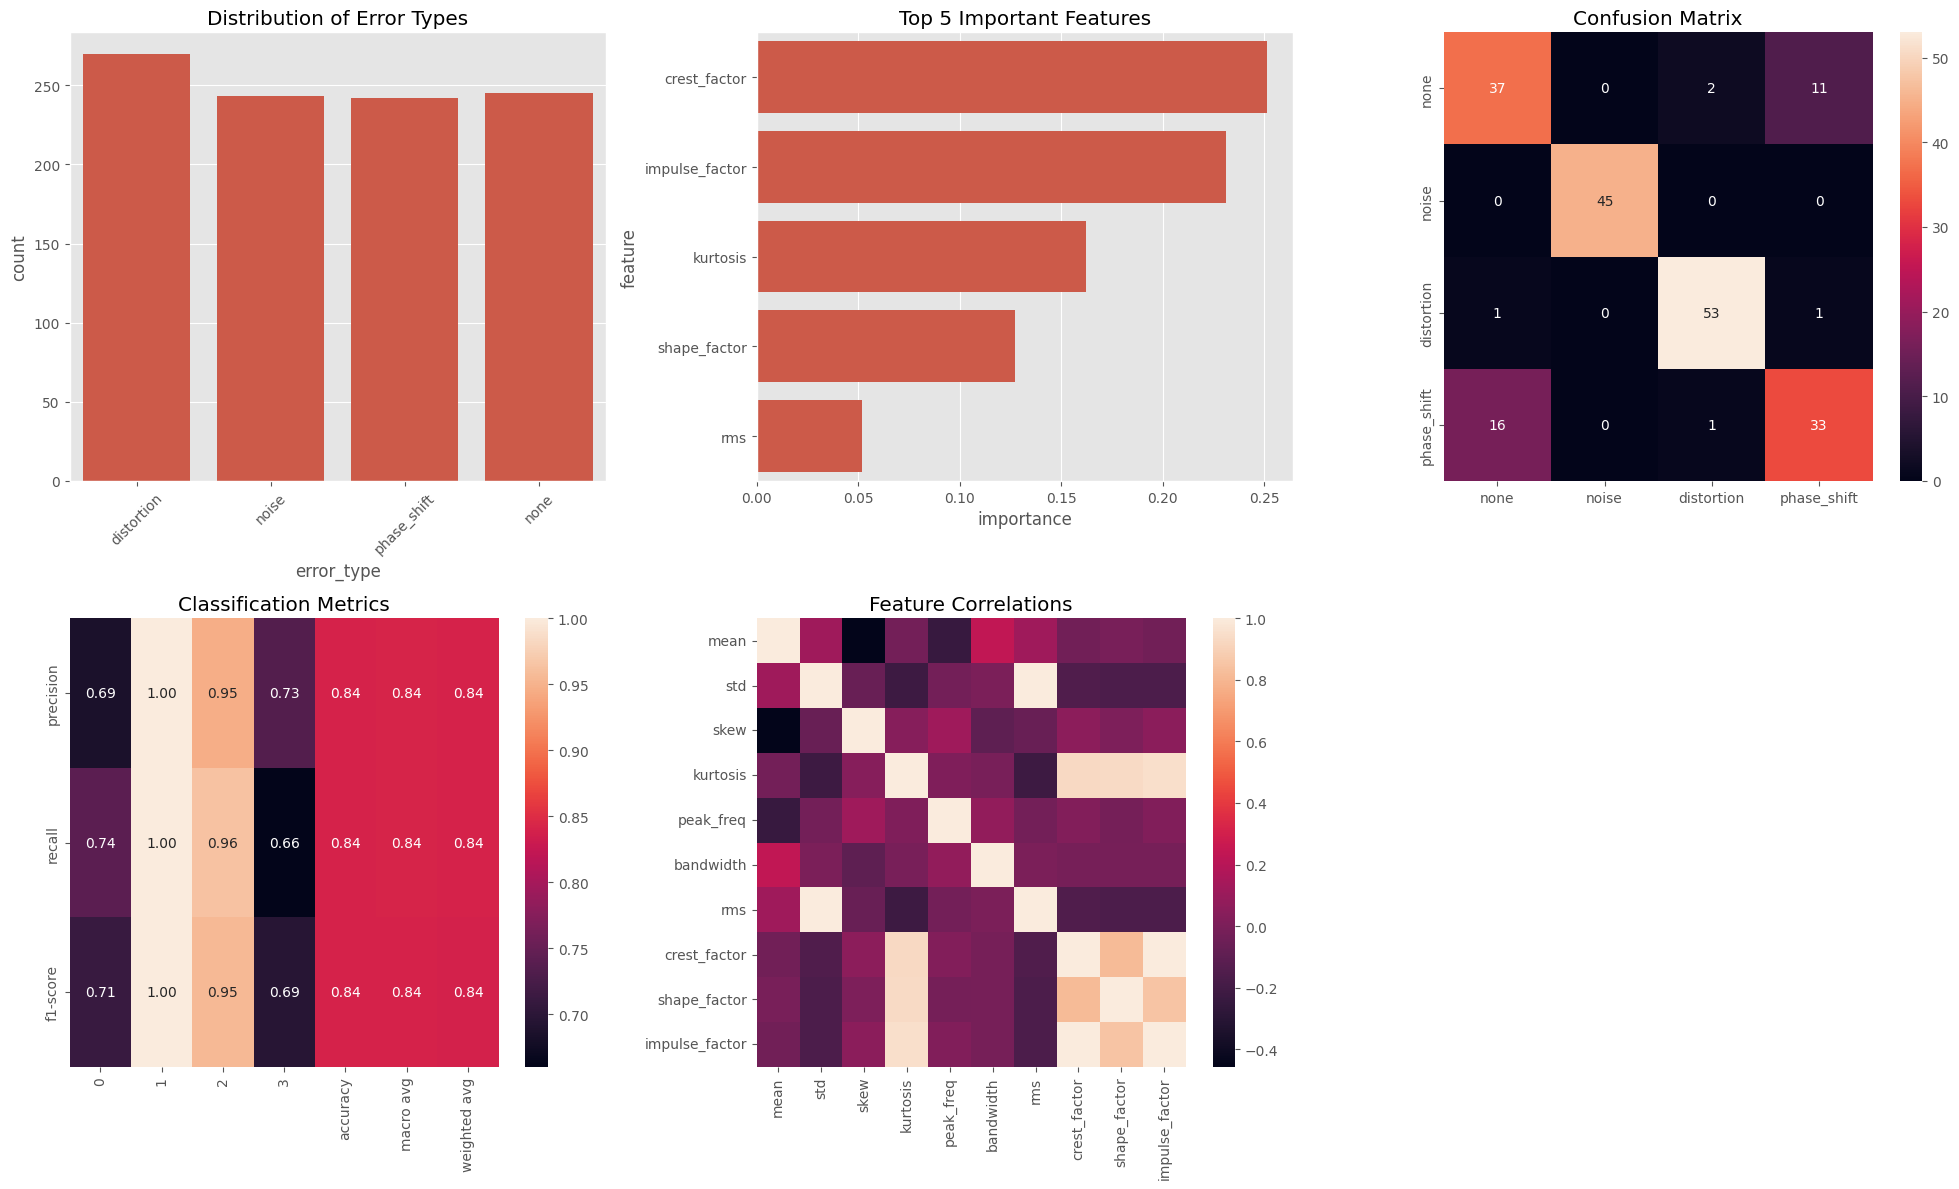


Detailed Classification Report:
              precision    recall  f1-score   support

        none       0.74      0.69      0.71        54
       noise       1.00      1.00      1.00        45
  distortion       0.96      0.95      0.95        56
 phase_shift       0.66      0.73      0.69        45

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Set random seed for reproducibility
np.random.seed(42)

class DSPErrorPredictor:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.data = None
        self.X = None
        self.y = None
        self.y_test = None

    def generate_signal_data(self, n_samples=1000):
        """Generate synthetic DSP signal data with various error patterns"""
        # Time vector
        t = np.linspace(0, 1, 100)

        # Initialize empty lists for features and labels
        signals = []
        labels = []

        for _ in range(n_samples):
            # Generate base signal (clean)
            base_freq = np.random.uniform(10, 50)
            amplitude = np.random.uniform(0.5, 2.0)
            clean_signal = amplitude * np.sin(2 * np.pi * base_freq * t)

            # Randomly introduce different types of errors
            error_type = np.random.choice(['none', 'noise', 'distortion', 'phase_shift'])

            if error_type == 'none':
                signal_with_error = clean_signal
                label = 0
            elif error_type == 'noise':
                noise = np.random.normal(0, 0.2, len(t))
                signal_with_error = clean_signal + noise
                label = 1
            elif error_type == 'distortion':
                signal_with_error = np.clip(clean_signal * 1.5, -1, 1)
                label = 2
            else:  # phase_shift
                phase_shift = np.random.uniform(0, np.pi/2)
                signal_with_error = amplitude * np.sin(2 * np.pi * base_freq * t + phase_shift)
                label = 3

            # Extract features from the signal
            features = self._extract_features(signal_with_error)
            signals.append(features)
            labels.append(label)

        # Convert to numpy arrays
        self.X = np.array(signals)
        self.y = np.array(labels)

        # Create DataFrame
        feature_names = ['mean', 'std', 'skew', 'kurtosis', 'peak_freq', 'bandwidth',
                        'rms', 'crest_factor', 'shape_factor', 'impulse_factor']
        self.data = pd.DataFrame(self.X, columns=feature_names)
        self.data['error_type'] = [['none', 'noise', 'distortion', 'phase_shift'][l] for l in self.y]

        return self.data

    def _extract_features(self, signal_data):
        """Extract relevant DSP features from the signal"""
        # Statistical features
        mean = np.mean(signal_data)
        std = np.std(signal_data)
        skew = self._calculate_skewness(signal_data)
        kurtosis = self._calculate_kurtosis(signal_data)

        # Frequency domain features
        freqs, psd = signal.welch(signal_data)
        peak_freq = freqs[np.argmax(psd)]
        bandwidth = np.sum(psd > np.max(psd)/2) * (freqs[1] - freqs[0])

        # Time domain features
        rms = np.sqrt(np.mean(signal_data**2))
        peak = np.max(np.abs(signal_data))
        crest_factor = peak / rms
        shape_factor = rms / np.mean(np.abs(signal_data))
        impulse_factor = peak / np.mean(np.abs(signal_data))

        return [mean, std, skew, kurtosis, peak_freq, bandwidth,
                rms, crest_factor, shape_factor, impulse_factor]

    def _calculate_skewness(self, data):
        """Calculate skewness of the signal"""
        n = len(data)
        mean = np.mean(data)
        std = np.std(data)
        return np.sum((data - mean)**3) / ((n-1) * std**3)

    def _calculate_kurtosis(self, data):
        """Calculate kurtosis of the signal"""
        n = len(data)
        mean = np.mean(data)
        std = np.std(data)
        return np.sum((data - mean)**4) / ((n-1) * std**4)

    def train_model(self):
        """Train the Random Forest model"""
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        self.model.fit(X_train, y_train)
        self.y_pred = self.model.predict(X_test)
        self.y_test = y_test

        # Store results for visualization
        self.confusion_mat = confusion_matrix(y_test, self.y_pred)
        self.classification_rep = classification_report(y_test, self.y_pred, output_dict=True)
        self.feature_importance = pd.DataFrame({
            'feature': self.data.columns[:-1],
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

        return self.classification_rep

    def create_dashboard(self):
        """Create an interactive dashboard for visualization"""
        # Style settings

        plt.style.use('ggplot')

        # Create subplots
        fig = plt.figure(figsize=(20, 12))

        # 1. Error Distribution
        plt.subplot(231)
        sns.countplot(data=self.data, x='error_type')
        plt.title('Distribution of Error Types')
        plt.xticks(rotation=45)

        # 2. Feature Importance
        plt.subplot(232)
        sns.barplot(data=self.feature_importance.head(5),
                   x='importance', y='feature')
        plt.title('Top 5 Important Features')

        # 3. Confusion Matrix
        plt.subplot(233)
        sns.heatmap(self.confusion_mat, annot=True, fmt='d',
                    xticklabels=['none', 'noise', 'distortion', 'phase_shift'],
                    yticklabels=['none', 'noise', 'distortion', 'phase_shift'])
        plt.title('Confusion Matrix')

        # 4. Performance Metrics
        plt.subplot(234)
        metrics_df = pd.DataFrame(self.classification_rep).drop(['support'], axis=0)
        sns.heatmap(metrics_df, annot=True, fmt='.2f')
        plt.title('Classification Metrics')

        # 5. Feature Correlations
        plt.subplot(235)
        correlation_matrix = self.data.drop('error_type', axis=1).corr()
        sns.heatmap(correlation_matrix, annot=False)
        plt.title('Feature Correlations')

        plt.tight_layout()
        plt.show()

        # Print classification report
        print("\nDetailed Classification Report:")
        print(classification_report(self.y_pred, self.y_test, target_names=['none', 'noise', 'distortion', 'phase_shift']))

# Example usage and dashboard creation
predictor = DSPErrorPredictor()
data = predictor.generate_signal_data(n_samples=1000)
predictor.train_model()
predictor.create_dashboard()